In [25]:
import numpy as np
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [66]:
df = pd.read_csv('https://raw.githubusercontent.com/gscdit/Breast-Cancer-Detection/refs/heads/master/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [67]:
df.shape

(569, 33)

In [68]:
df.drop(columns=['id', 'Unnamed: 32'], inplace= True)

In [69]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [70]:
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,1:], df.iloc[:, 0] , test_size=0.2)

In [71]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [72]:
x_train

array([[ 0.23568654,  0.23563741,  0.1956502 , ..., -0.18169881,
        -0.83465245, -1.00305866],
       [-0.81356589,  0.1774872 , -0.74972328, ..., -0.31342838,
         0.10876372, -0.77658896],
       [-0.81647241, -1.02738502, -0.84848104, ..., -1.49022283,
        -0.11662581, -0.55067162],
       ...,
       [ 0.05548252,  0.68688299,  0.20831145, ...,  1.000174  ,
        -0.06993798,  1.60465713],
       [ 1.81683149,  1.82895299,  1.74791968, ...,  0.86475108,
         0.42430906, -0.22974748],
       [ 0.29672339,  1.52191991,  0.27499404, ...,  0.60159971,
        -0.37582377,  0.56510595]])

In [73]:
y_train

,diagnosis
495,B
288,B
333,B
179,B
257,M
...,...
224,B
440,B
62,M
260,M


### Label Encoding

In [74]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [75]:
y_train

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,

In [76]:
x_train_tensor = torch.from_numpy(x_train.astype(np.float32))
x_test_tensor = torch.from_numpy(x_test.astype(np.float32))
y_train_tensor = torch.from_numpy(y_train.astype(np.float32))
y_test_tensor = torch.from_numpy(y_test.astype(np.float32))

In [77]:
x_train_tensor

tensor([[ 0.2357,  0.2356,  0.1957,  ..., -0.1817, -0.8347, -1.0031],
        [-0.8136,  0.1775, -0.7497,  ..., -0.3134,  0.1088, -0.7766],
        [-0.8165, -1.0274, -0.8485,  ..., -1.4902, -0.1166, -0.5507],
        ...,
        [ 0.0555,  0.6869,  0.2083,  ...,  1.0002, -0.0699,  1.6047],
        [ 1.8168,  1.8290,  1.7479,  ...,  0.8648,  0.4243, -0.2297],
        [ 0.2967,  1.5219,  0.2750,  ...,  0.6016, -0.3758,  0.5651]])

In [78]:
x_train_tensor.shape

torch.Size([455, 30])

In [79]:
y_train_tensor.shape

torch.Size([455])

### Defining the model

  using self defined loss function
  


In [80]:
import torch.nn as nn

class MySimpleNN(nn.Module):
  def __init__ (self , num_features):

    super().__init__()
    self.linear = nn.Linear(num_features , 1)
    self.sigmoid = nn.Sigmoid()

  def forward(self , features):

    out = self.linear(features)
    out = self.sigmoid(out)

    return out




  def loss_function(self , y_pred , y):

    # Clamp predictions to avoid log(0)
    epsilon = 1e-7
    y_pred = torch.clamp(y_pred, epsilon, 1 - epsilon)

    # calculate loss
    loss = -(y_train_tensor * torch.log(y_pred) + (1  - y_train_tensor) * torch.log(1 - y_pred)).mean()

    return loss




### Important Parameters

In [81]:
learning_rate = 0.1
epochs = 25

### Training Pipeline

In [82]:
# Create the model
model = MySimpleNN(x_train_tensor.shape[1])

# define loop
for epoch in range(epochs):

  # forward pass
  y_pred = model(x_train_tensor)


  # loss calculate

  loss = model.loss_function(y_pred , y_train_tensor)


  # backward pass

  loss.backward()

  # update parameters
  with torch.no_grad():
    model.linear.weight -= learning_rate * model.linear.weight.grad
    model.linear.bias -= learning_rate * model.linear.bias.grad

  # zero gradients
  model.linear.weight.grad.zero_()
  model.linear.bias.grad.zero_()

  # print loss in each epoch
  print( f'Epoch : {epoch + 1} , Loss : {loss.item()}')


Epoch : 1 , Loss : 0.7305570840835571
Epoch : 2 , Loss : 0.7217766642570496
Epoch : 3 , Loss : 0.7146798968315125
Epoch : 4 , Loss : 0.7088761925697327
Epoch : 5 , Loss : 0.7040752172470093
Epoch : 6 , Loss : 0.7000580430030823
Epoch : 7 , Loss : 0.6966573596000671
Epoch : 8 , Loss : 0.6937444806098938
Epoch : 9 , Loss : 0.6912198066711426
Epoch : 10 , Loss : 0.6890064477920532
Epoch : 11 , Loss : 0.6870445609092712
Epoch : 12 , Loss : 0.6852878332138062
Epoch : 13 , Loss : 0.6837003231048584
Epoch : 14 , Loss : 0.6822540163993835
Epoch : 15 , Loss : 0.6809267401695251
Epoch : 16 , Loss : 0.6797012090682983
Epoch : 17 , Loss : 0.6785637140274048
Epoch : 18 , Loss : 0.6775033473968506
Epoch : 19 , Loss : 0.6765111684799194
Epoch : 20 , Loss : 0.6755799651145935
Epoch : 21 , Loss : 0.6747037768363953
Epoch : 22 , Loss : 0.6738775372505188
Epoch : 23 , Loss : 0.6730970740318298
Epoch : 24 , Loss : 0.6723588705062866
Epoch : 25 , Loss : 0.6716596484184265


In [84]:
model.linear.weight

Parameter containing:
tensor([[-0.1268,  0.0653, -0.0768, -0.0040,  0.0538, -0.0465,  0.1639,  0.1661,
          0.0504, -0.0488,  0.1305, -0.0740,  0.0164, -0.0839, -0.1123, -0.0717,
         -0.0127,  0.0653, -0.0748,  0.0657, -0.1111,  0.0316, -0.0572,  0.0793,
         -0.0963,  0.0155, -0.1737, -0.0299,  0.0823,  0.0283]],
       requires_grad=True)

In [85]:
model.linear.bias

Parameter containing:
tensor([-0.2519], requires_grad=True)

### model evaluation

In [86]:
with torch.no_grad():
  y_pred = model.forward(x_test_tensor)
  y_pred = (y_pred > 0.5).float() # here basically we are scaling the predicted value to either 0 or 1 as we have only 0 and 1 in the (y real) test data
  accuracy = (y_pred == y_test_tensor).float().mean()
  print(f'Accuracy : {accuracy}')


Accuracy : 0.5727916359901428


#### way 2
_________________________________

### Defining the model

  using  nn module loss function

In [87]:

import torch.nn as nn

class MySimpleNN(nn.Module):
  def __init__ (self , num_features):

    super().__init__()
    self.linear = nn.Linear(num_features , 1)
    self.sigmoid = nn.Sigmoid()

  def forward(self , features):

    out = self.linear(features)
    out = self.sigmoid(out)

    return out



### Important Parameters

In [88]:
learning_rate = 0.1
epochs = 25

In [89]:
loss_function = nn.BCELoss() # Binary cross entropy loss

In [90]:
type(loss_function)

torch.nn.modules.loss.BCELoss

### Training Pipeline

In [91]:
# Create the model
model = MySimpleNN(x_train_tensor.shape[1])

# define loop
for epoch in range(epochs):

  # forward pass
  y_pred = model(x_train_tensor)


  # loss calculate

  loss = loss_function(y_pred , y_train_tensor.view(-1 , 1))

  if(epoch == 0):
    print(y_pred.shape , y_train_tensor.shape)
    print(y_pred.shape , y_train_tensor.view(-1 , 1).shape)
  # view is basically reshaping the data as y_pred and y_train_tensor has different shape


  # backward pass

  loss.backward()

  # update parameters
  with torch.no_grad():
    model.linear.weight -= learning_rate * model.linear.weight.grad
    model.linear.bias -= learning_rate * model.linear.bias.grad

  # zero gradients
  model.linear.weight.grad.zero_()
  model.linear.bias.grad.zero_()

  # print loss in each epoch
  print( f'Epoch : {epoch + 1} , Loss : {loss.item()}')


torch.Size([455, 1]) torch.Size([455])
torch.Size([455, 1]) torch.Size([455, 1])
Epoch : 1 , Loss : 0.7927843928337097
Epoch : 2 , Loss : 0.5766426920890808
Epoch : 3 , Loss : 0.46852171421051025
Epoch : 4 , Loss : 0.404598593711853
Epoch : 5 , Loss : 0.36170291900634766
Epoch : 6 , Loss : 0.3305189311504364
Epoch : 7 , Loss : 0.30659252405166626
Epoch : 8 , Loss : 0.28751060366630554
Epoch : 9 , Loss : 0.2718436121940613
Epoch : 10 , Loss : 0.25868648290634155
Epoch : 11 , Loss : 0.2474360316991806
Epoch : 12 , Loss : 0.2376732975244522
Epoch : 13 , Loss : 0.22909757494926453
Epoch : 14 , Loss : 0.22148659825325012
Epoch : 15 , Loss : 0.21467238664627075
Epoch : 16 , Loss : 0.20852519571781158
Epoch : 17 , Loss : 0.20294323563575745
Epoch : 18 , Loss : 0.19784516096115112
Epoch : 19 , Loss : 0.19316524267196655
Epoch : 20 , Loss : 0.18884970247745514
Epoch : 21 , Loss : 0.18485397100448608
Epoch : 22 , Loss : 0.18114086985588074
Epoch : 23 , Loss : 0.17767895758152008
Epoch : 24 , Los

In [92]:
model.linear.weight

Parameter containing:
tensor([[ 8.8788e-02,  2.5550e-01,  9.5525e-02,  4.1152e-01,  5.4666e-02,
          5.0478e-02,  6.1624e-02,  3.1630e-01,  1.9674e-01,  3.7781e-04,
          3.1928e-01, -3.3321e-02,  6.2717e-02,  3.0794e-01, -1.9095e-01,
          1.3325e-01,  9.3159e-02,  4.3568e-02, -5.8098e-02, -4.7996e-02,
          1.5895e-01,  2.3634e-01,  3.3876e-01,  2.7806e-01,  2.7489e-01,
          1.7825e-01,  1.7977e-01,  2.5424e-01,  7.8822e-02, -9.8970e-02]],
       requires_grad=True)

In [93]:
model.linear.bias

Parameter containing:
tensor([-0.1449], requires_grad=True)

### model evaluation

In [94]:
with torch.no_grad():
  y_pred = model.forward(x_test_tensor)
  y_pred = (y_pred > 0.5).float() # here basically we are scaling the predicted value to either 0 or 1 as we have only 0 and 1 in the (y real) test data
  accuracy = (y_pred == y_test_tensor).float().mean()
  print(f'Accuracy : {accuracy}')


Accuracy : 0.5152354836463928


### ______________________

#using nn optimizers rather than updating weight manually
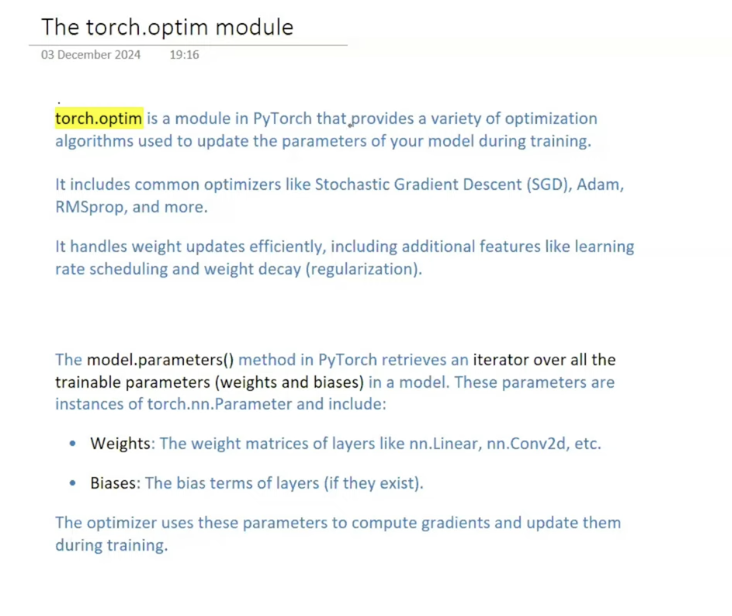

### Defining the model

In [101]:
import torch.nn as nn

class MySimpleNN(nn.Module):
  def __init__ (self , num_features):

    super().__init__()
    self.linear = nn.Linear(num_features , 1)
    self.sigmoid = nn.Sigmoid()

  def forward(self , features):

    out = self.linear(features)
    out = self.sigmoid(out)

    return out



### Important Parameters

In [102]:
learning_rate = 0.1
epochs = 25

In [103]:
loss_function = nn.BCELoss() # Binary cross entropy loss

### Training Pipeline

In [104]:
# Create the model
model = MySimpleNN(x_train_tensor.shape[1])

# Define optimiszer
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate) # SGD = stochastic gradient descent


# define loop
for epoch in range(epochs):

  # forward pass
  y_pred = model(x_train_tensor)


  # loss calculate
  loss = loss_function(y_pred , y_train_tensor.view(-1 , 1))




  # clear gradients
  optimizer.zero_grad()


  # backward pass
  loss.backward()

  # update parameters
  optimizer.step()



  # print loss in each epoch
  print( f'Epoch : {epoch + 1} , Loss : {loss.item()}')


Epoch : 1 , Loss : 0.5931798815727234
Epoch : 2 , Loss : 0.47344616055488586
Epoch : 3 , Loss : 0.40497565269470215
Epoch : 4 , Loss : 0.3597719669342041
Epoch : 5 , Loss : 0.3272426128387451
Epoch : 6 , Loss : 0.3024933934211731
Epoch : 7 , Loss : 0.2829028069972992
Epoch : 8 , Loss : 0.266927033662796
Epoch : 9 , Loss : 0.25359290838241577
Epoch : 10 , Loss : 0.24225467443466187
Epoch : 11 , Loss : 0.23246577382087708
Epoch : 12 , Loss : 0.22390681505203247
Epoch : 13 , Loss : 0.2163427621126175
Epoch : 14 , Loss : 0.20959670841693878
Epoch : 15 , Loss : 0.20353248715400696
Epoch : 16 , Loss : 0.1980436146259308
Epoch : 17 , Loss : 0.19304540753364563
Epoch : 18 , Loss : 0.18846958875656128
Epoch : 19 , Loss : 0.18426045775413513
Epoch : 20 , Loss : 0.18037204444408417
Epoch : 21 , Loss : 0.17676609754562378
Epoch : 22 , Loss : 0.17341041564941406
Epoch : 23 , Loss : 0.1702776998281479
Epoch : 24 , Loss : 0.16734468936920166
Epoch : 25 , Loss : 0.16459131240844727


### Model Evaluation

In [106]:
with torch.no_grad():
  y_pred = model.forward(x_test_tensor)
  y_pred = (y_pred > 0.5).float() # here basically we are scaling the predicted value to either 0 or 1 as we have only 0 and 1 in the (y real) test data
  accuracy = (y_pred == y_test_tensor).float().mean()
  print(f'Accuracy : {accuracy}')


Accuracy : 0.5169283151626587
